In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# 1. Import the data

In [3]:
reviews = pd.read_csv('moviereviews.tsv', sep='\t')
# 2. Get rid of NA data
reviews = reviews.dropna()
reviews

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...
...,...,...
5995,pos,"Of the three remakes of this plot, I like them..."
5996,neg,Poor Whoopi Goldberg. Imagine her at a friend'...
5997,neg,"Honestly before I watched this movie, I had he..."
5998,pos,This movie is essentially shot on a hand held ...


In [4]:
y = (reviews['label'] == 'pos').astype(int)
review = reviews['review'].apply(lambda x: x.lower())

In [5]:
# 3. Split the data
review_train, review_test, y_train, y_test = train_test_split(review, y, stratify=y, random_state=713, test_size=0.4)

In [6]:
review_test.shape

(2392,)

In [7]:
sw = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [8]:
# 4. Count Vectorizer
cv = CountVectorizer(stop_words=sw, ngram_range=(1,2), min_df=50)
cv.fit(review_train)
X_train = cv.transform(review_train).toarray()
X_test = cv.transform(review_test).toarray()

In [ ]:
# 5. Fit all 5 models below.

In [133]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

In [42]:
y_hat = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:,1]
confusion_matrix(y_test, y_hat)

array([[1050,  146],
       [ 120, 1076]], dtype=int64)

In [43]:
metrics.accuracy_score(y_test, y_hat)

0.8887959866220736

In [44]:
metrics.precision_score(y_test, y_hat)

0.8805237315875614

In [45]:
metrics.recall_score(y_test, y_hat)

0.8996655518394648

In [46]:
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1196
           1       0.88      0.90      0.89      1196

    accuracy                           0.89      2392
   macro avg       0.89      0.89      0.89      2392
weighted avg       0.89      0.89      0.89      2392



In [48]:
roc_auc_score(y_test, y_prob)

0.9539231943714277

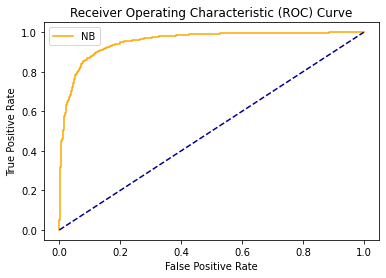

In [51]:
fpr, tpr, thresh = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [53]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear', C=1)

In [54]:
lr.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [55]:
y_hat_lr = lr.predict(X_test)

In [57]:
y_prob_lr = lr.predict_proba(X_test)[:,1]

In [59]:
confusion_matrix(y_test, y_hat_lr)

array([[1042,  154],
       [ 140, 1056]], dtype=int64)

In [63]:
print(metrics.precision_score(y_test, y_hat_lr))
print(metrics.recall_score(y_test, y_hat_lr))
print(roc_auc_score(y_test, y_prob_lr))

0.8727272727272727
0.882943143812709
0.9453089171262066


In [121]:
metrics.accuracy_score(y_test, y_hat_lr)

0.8770903010033445

In [122]:
print(metrics.classification_report(y_test, y_hat_lr))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1196
           1       0.87      0.88      0.88      1196

    accuracy                           0.88      2392
   macro avg       0.88      0.88      0.88      2392
weighted avg       0.88      0.88      0.88      2392



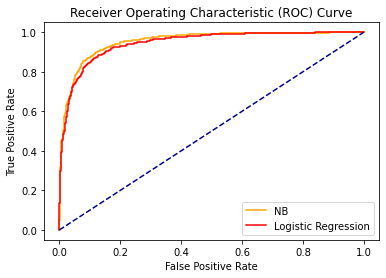

In [68]:
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='red',label='Logistic Regression')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [78]:
# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.get_depth()

71

In [80]:
yhat = clf.predict(X_test)

In [82]:
metrics.accuracy_score(y_test, yhat)

0.7508361204013378

In [84]:
metrics.confusion_matrix(y_test, yhat)

array([[890, 306],
       [290, 906]], dtype=int64)

In [86]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1196
           1       0.75      0.76      0.75      1196

    accuracy                           0.75      2392
   macro avg       0.75      0.75      0.75      2392
weighted avg       0.75      0.75      0.75      2392



In [89]:
y_prob_t = clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob_t)

0.7508361204013378

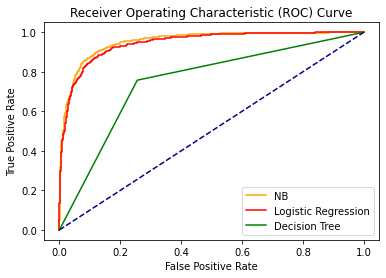

In [93]:
fpr_t, tpr_t, thresh = roc_curve(y_test, y_prob_t)
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='red',label='Logistic Regression')
plt.plot(fpr_t, tpr_t, color='green', label='Decision Tree')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [96]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
rf_pred = rf.predict(X_test)

In [100]:
metrics.confusion_matrix(y_test, rf_pred)

array([[1042,  154],
       [ 140, 1056]], dtype=int64)

In [104]:
metrics.accuracy_score(y_test, rf_pred)

0.8770903010033445

In [105]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1196
           1       0.87      0.88      0.88      1196

    accuracy                           0.88      2392
   macro avg       0.88      0.88      0.88      2392
weighted avg       0.88      0.88      0.88      2392



In [107]:
y_prob_rf = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob_rf)

0.9443567465688303

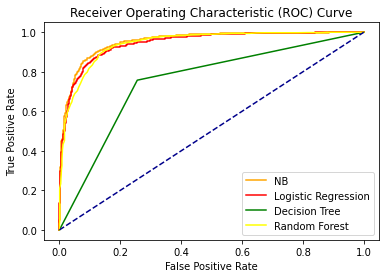

In [109]:
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='red',label='Logistic Regression')
plt.plot(fpr_t, tpr_t, color='green', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, color='yellow', label='Random Forest')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [112]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [114]:
gb_pred = gb.predict(X_test)
metrics.confusion_matrix(y_test, gb_pred)

array([[ 966,  230],
       [ 111, 1085]], dtype=int64)

In [116]:
metrics.accuracy_score(y_test, gb_pred)

0.8574414715719063

In [117]:
print(metrics.classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1196
           1       0.83      0.91      0.86      1196

    accuracy                           0.86      2392
   macro avg       0.86      0.86      0.86      2392
weighted avg       0.86      0.86      0.86      2392



In [119]:
y_prob_gb = gb.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob_gb)

0.9304177945436851

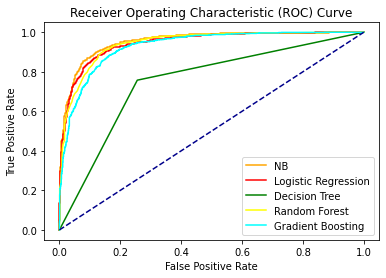

In [123]:
fpr_gb, tpr_gb, thresh = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr, color='orange', label='NB')
plt.plot(fpr_lr, tpr_lr, color='red',label='Logistic Regression')
plt.plot(fpr_t, tpr_t, color='green', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, color='yellow', label='Random Forest')
plt.plot(fpr_gb, tpr_gb, color='cyan', label='Gradient Boosting')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)

In [160]:
# ^6. The Accuracy, F1 score, and AUC for each model is represented above when 
# we fit the models. 

# The best model is the Naive Bayes model, based upon the F1 score.

In [ ]:
# 7. What Words are most important?

In [140]:
importances_tree = clf.feature_importances_

In [152]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [154]:
tree.feature_importances_

array([0.00178372, 0.00107754, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [156]:
tree.get_depth()

70

In [159]:
Importance = pd.DataFrame({'Importance':tree.feature_importances_*100}, index=X_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'